# LIF модель нейрона


### Уравнение

Модель LIF нейрона описывается дифференциальным уравнением первого порядка следующего вида:

$$
\tau_m \frac{dV(t)}{dt} = \frac{I(t)}{g_L} - (V(t) - V_r)
$$

### Разностная схема

$$
V_{i+1} = (\frac{I(t)}{g_L} - (V(t) - V_r)) \cdot \frac{\Delta t}{\tau_m} + V_i
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

In [3]:
def bipolar_rectangle(amplitude = 0.1, frequency = 1, reprtition = 1, n_points = 100):
    period = 1 / frequency
    time_array = np.linspace(0, reprtition * period, reprtition * n_points)
    half_period = period / 2
    t = time_array
    voltage = []
    for j in range(reprtition):
        for i in t[j * n_points: (j+1) * n_points]:
            if (i <= (t[j * n_points] + half_period/2)) or ((i > (t[j * n_points] + half_period)) and i < (t[j * n_points] + 3/2 *half_period)):
                voltage.append( 0)
            elif (i > (t[j * n_points] + half_period/2)) and i < (t[j * n_points] + half_period):
                voltage.append(amplitude)
            elif (i > (t[j * n_points] + 3/2 *half_period)):
                voltage.append(0)
    voltage[-1] = 0
    V = np.array(voltage)
    return [time_array, V]

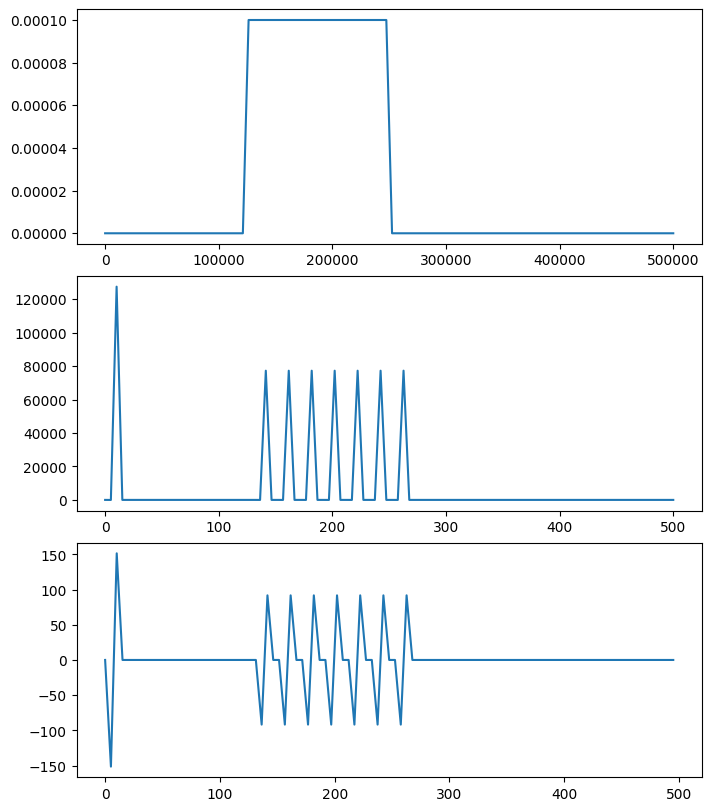

In [19]:
t, I = bipolar_rectangle(reprtition=1, amplitude=0.0000001, frequency= 0.002,n_points=100)

tau_m = 0.001
resistance = 6
g_L = 1/resistance
V_0 = 0
V_th = 0.03
V_reset = -0.005
V_start = [V_0]
delta_t = t[1] - t[0]

for i in range(len(t) - 1):
    if V_start[i] >= V_th:
        V_start.append(V_reset)
    else:
        V_start.append((I[i]/g_L - (V_start[i] - V_reset)) * delta_t / tau_m + V_start[i])

I_spike = I[:-1] - np.array([resistance * tau_m * (V_start[i+1] - V_start[i])/delta_t for i in range(len(t)-1)]) 

V_start = np.array(V_start)

fig = plt.figure(figsize=[7,8], constrained_layout=True)
gs = GridSpec(ncols=1, nrows=3, figure=fig)
ax_1 = fig.add_subplot(gs[0])
line_1, = ax_1.plot(t*1000, I*1000)
ax_2 = fig.add_subplot(gs[1])
line_2, = ax_2.plot(t, V_start)
ax_3 = fig.add_subplot(gs[2])
line_3, = ax_3.plot(t[:-1], I_spike)
#ax_3.set_yscale('log')

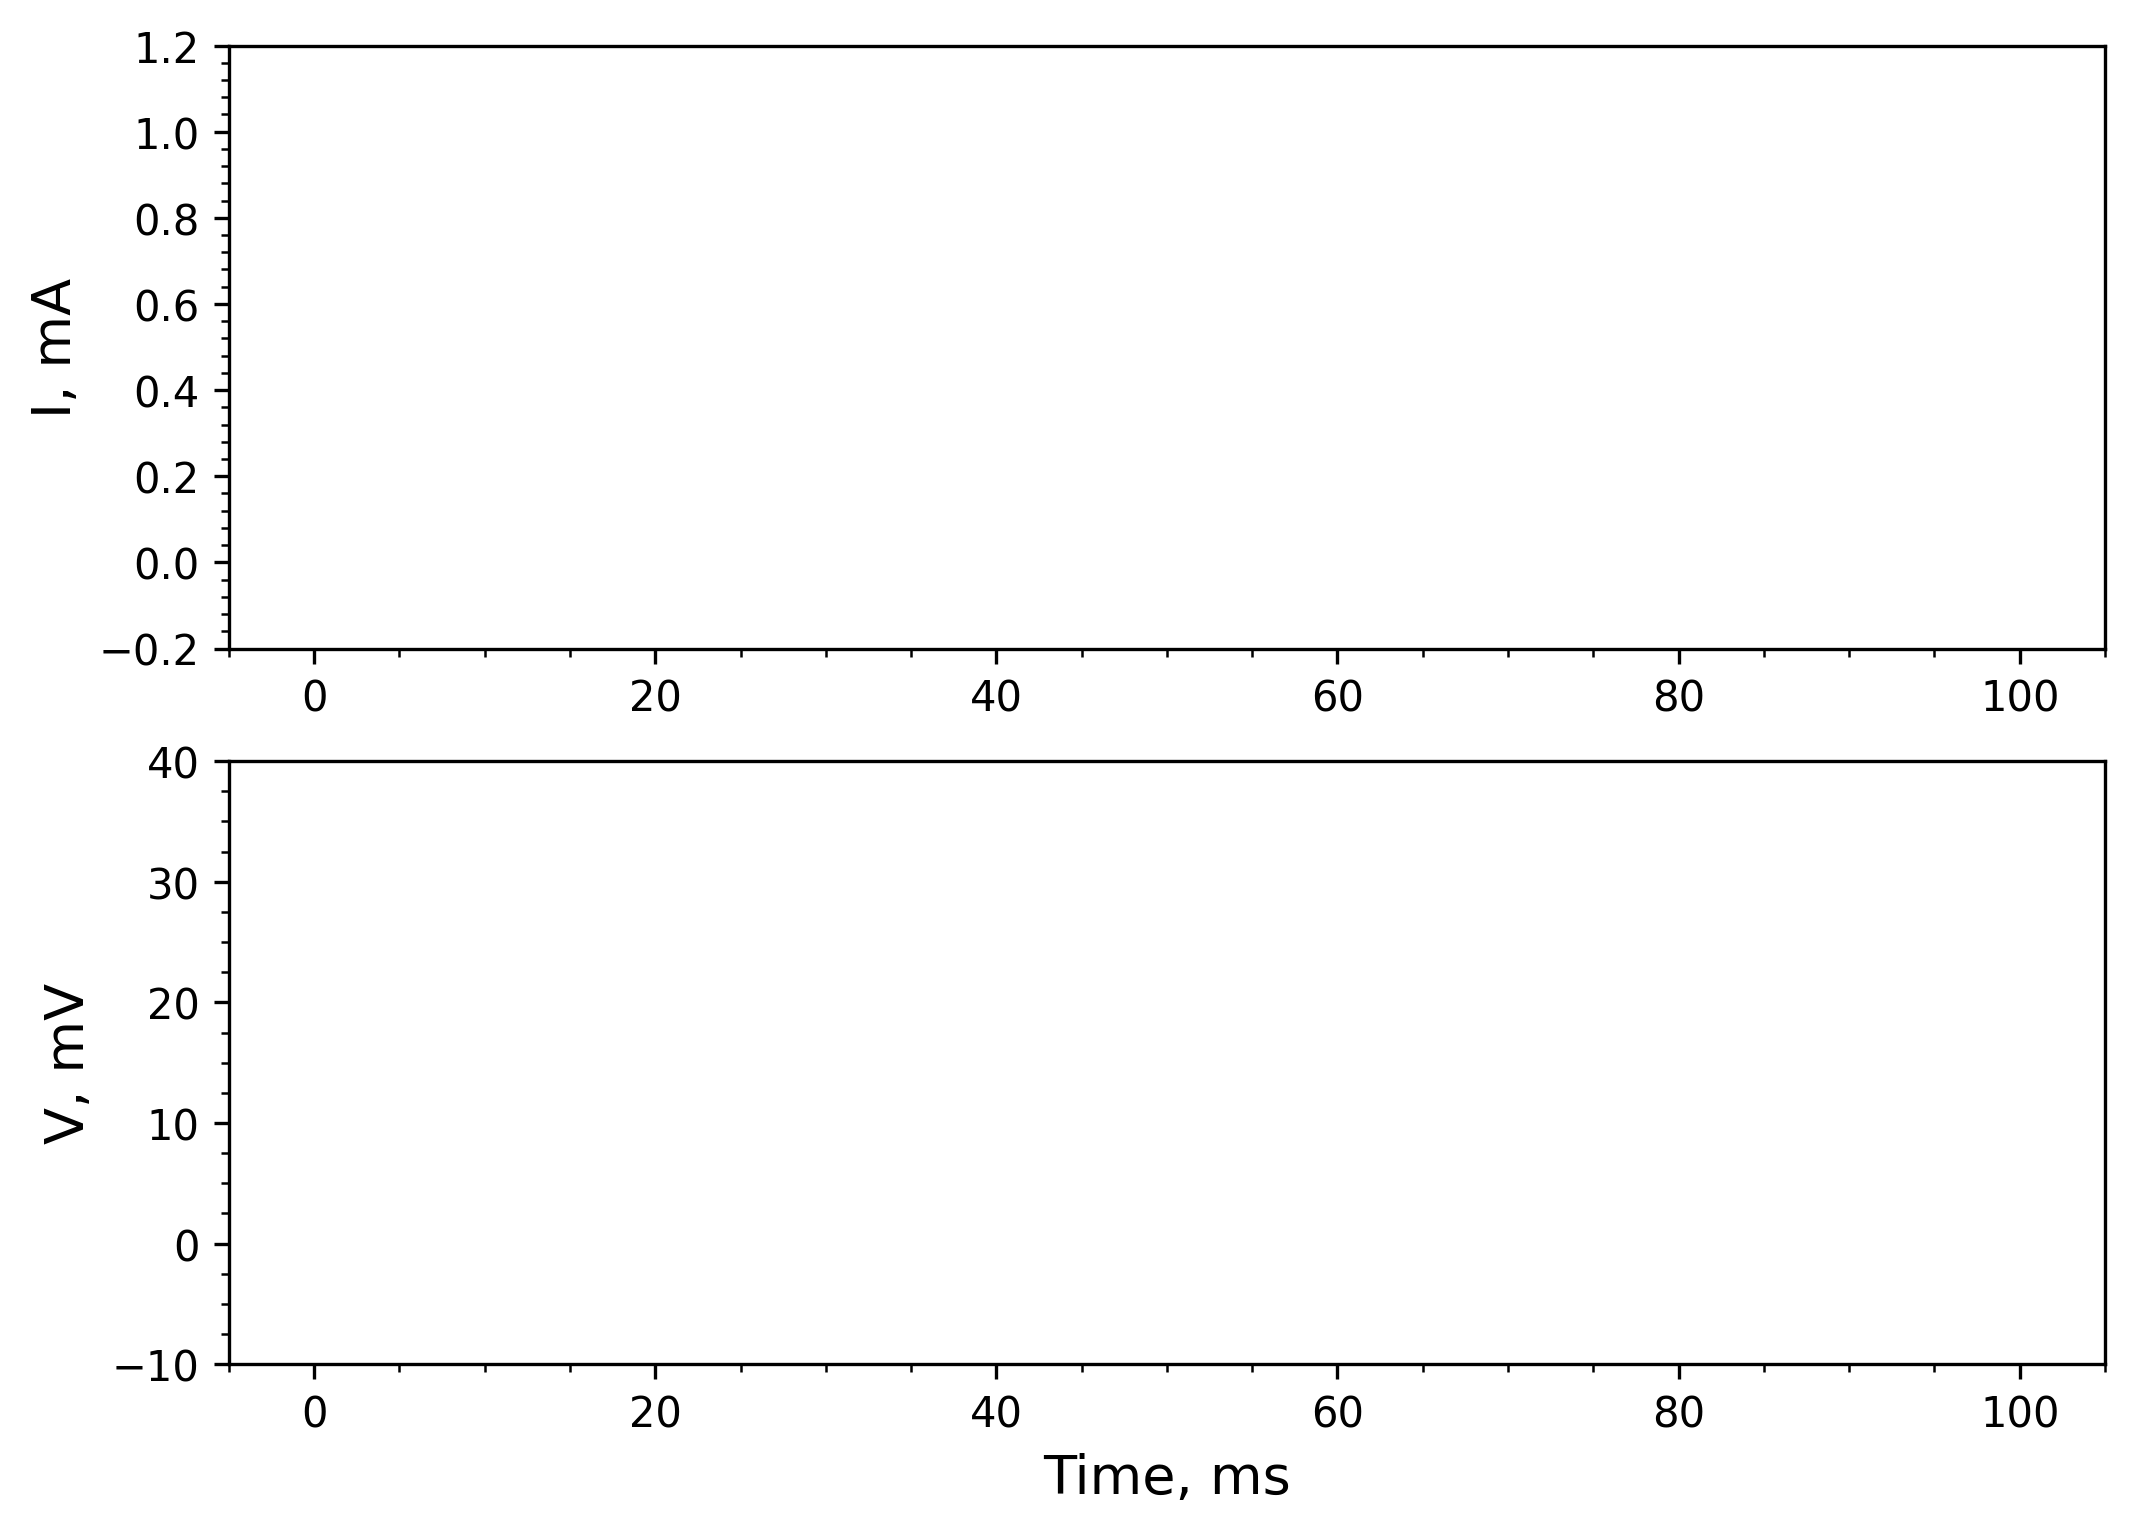

In [20]:
fig = plt.figure(figsize=[7,5], constrained_layout=True, dpi=300)
gs = GridSpec(ncols=1, nrows=2, figure=fig)

ax_1 = fig.add_subplot(gs[0])
line_1, = ax_1.plot(t*1000, I*1000)
ax_1.set(xlim=[-5, 105], ylim=[-0.2, 1.2])
ax_1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax_1.yaxis.set_minor_locator(ticker.MultipleLocator(0.04))
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax_1.set_ylabel('I, mA', size = 13)

ax_2 = fig.add_subplot(gs[1])
line_2, = ax_2.plot(t*1000, V_start*1000)
ax_2.set(xlim=[-5, 105], ylim=[-10, 40])
ax_2.set_ylabel('V, mV', size = 13)
ax_2.set_xlabel('Time, ms', size = 13)
ax_2.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax_2.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax_2.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax_2.xaxis.set_minor_locator(ticker.MultipleLocator(5))

def update(frame):
    line_1.set_data(t[:frame*2]*1000, I[:frame*2] * 1000)
    line_2.set_data(t[:frame*2]*1000, V_start[:frame*2]* 1000)

anim = FuncAnimation(fig, update, frames=220, interval=50)
#anim.save('LIF_spiking.gif')